In [22]:
import matplotlib.pyplot as plt
import numpy as np
import numdifftools as nd

In [23]:
def rosenbrock(x):
    # минимум находится в (1, 1) и равен 0
    return (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2

In [24]:
random_state = 48
np.random.seed(random_state)
x0 = np.random.uniform(-2, 2, 2)
history = {}  # словарь для хранения истории значений функции для каждого метода
history_x = {}  # словарь для хранения истории x для каждого метода

# Метод Нестерова

In [25]:
def nesterov(func, x0, learning_rate=0.0001, momentum=0.9, max_iter=10000, tol=0.001):
    x = np.array(x0, dtype=float)
    v = np.zeros_like(x)  # скорость

    method_name = "Метод Нестерова"
    history[method_name] = []
    history_x[method_name] = []

    grad_obj = nd.Gradient(func)

    for i in range(max_iter):
        x_ahead = x + momentum * v
        grad = grad_obj(x_ahead)  # градиент в точке x_ahead
        v_new = momentum * v - learning_rate * grad  # обновляем скорость
        x_new = x + v_new  # обновляем положение

        if np.abs(func(x_new) - func(x)) < tol:
            x = x_new
            history[method_name].append(func(x))
            history_x[method_name].append(x)
            break

        x = x_new
        v = v_new
        history[method_name].append(func(x))
        history_x[method_name].append(x)

    return x, func(x), i + 1  # финальное x, значение функции, количество итераций за которое достигли сходимости

# Метод тяжелого шарика

In [26]:
def heavy_ball(func, x0, learning_rate=0.0001, momentum=0.9, max_iter=10000, tol=0.001):
    x = np.array(x0, dtype=float)
    v = np.zeros_like(x)

    method_name = "Метод тяжелого шарика"
    history[method_name] = []
    history_x[method_name] = []
    grad_obj = nd.Gradient(func)

    for i in range(max_iter):
        grad = grad_obj(x)
        v_new = momentum * v - learning_rate * grad  # обновляем скорость
        x_new = x + v_new  # обновляем положение

        if np.abs(func(x_new) - func(x)) < tol:
            x = x_new
            history[method_name].append(func(x))
            history_x[method_name].append(x)
            break

        x = x_new
        v = v_new
        history[method_name].append(func(x))
        history_x[method_name].append(x)

    return x, func(x), i + 1

# Метод Ньютона

In [27]:
def newton(func, x0, max_iter=1000, tol=0.001):
    x = np.array(x0, dtype=float)

    method_name = "Метод Ньютона"
    history[method_name] = []
    history_x[method_name] = []

    grad_obj = nd.Gradient(func)
    hess_obj = nd.Hessian(func)

    for i in range(max_iter):
        # градиент и гессиан именно здесь
        grad = grad_obj(x)
        hess = hess_obj(x)

        # проверка на вырожденность гессиана
        try:
            # Находим направление спуска: -H^-1 * grad
            delta_x = -np.linalg.solve(hess, grad)
        except np.linalg.LinAlgError:
            print(f"Гессиан вырожден на итерации {i}")
            delta_x = -grad  # градиентный спуск если гессиан вырожден

        x_new = x + delta_x

        if np.abs(func(x_new) - func(x)) < tol:
            x = x_new
            history[method_name].append(func(x))
            history_x[method_name].append(x)
            break

        x = x_new
        history[method_name].append(func(x))
        history_x[method_name].append(x)

    return x, func(x), i + 1

In [28]:
print(f"Начальное приближение: {x0}")
print(f"Значение функции в начальной точке: {rosenbrock(x0)}")

Начальное приближение: [-1.93003892  1.56629307]
Значение функции в начальной точке: 474.6083711529007


In [29]:
print(f"Метод Нестерова:")
final_x_nesterov, fun_nesterov, iters_nesterov = nesterov(
    rosenbrock, x0, learning_rate=0.0001, momentum=0.9, tol=0.001
)

print(f"Минимум в: {final_x_nesterov}")
print(f"Значение функции в минимуме: {fun_nesterov}")
print(f"Количество итераций: {iters_nesterov}")

print("\nМетод тяжелого шарика:")
final_x_heavy_ball, fun_heavy_ball, iters_heavy_ball = heavy_ball(
    rosenbrock, x0, learning_rate=0.0001, momentum=0.9, tol=0.001
)
print(f"Минимум в: {final_x_heavy_ball}")
print(f"Значение функции в минимуме: {fun_heavy_ball}")
print(f"Количество итераций: {iters_heavy_ball}")

print("\nМетод Ньютона:")
final_x_newton, fun_newton, iters_newton = newton(
    rosenbrock, x0, tol=0.001
)
print(f"Минимум в: {final_x_newton}")
print(f"Значение функции в минимуме: {fun_newton}")
print(f"Количество итераций: {iters_newton}")

Метод Нестерова:
Минимум в: [-1.13971642  1.31586965]
Значение функции в минимуме: 4.607001904143646
Количество итераций: 40

Метод тяжелого шарика:
Минимум в: [-0.62715705  0.42746264]
Значение функции в минимуме: 2.7641713560835437
Количество итераций: 79

Метод Ньютона:
Минимум в: [1.         0.99929548]
Значение функции в минимуме: 4.9634530413517605e-05
Количество итераций: 4


# Визуализация сходимости

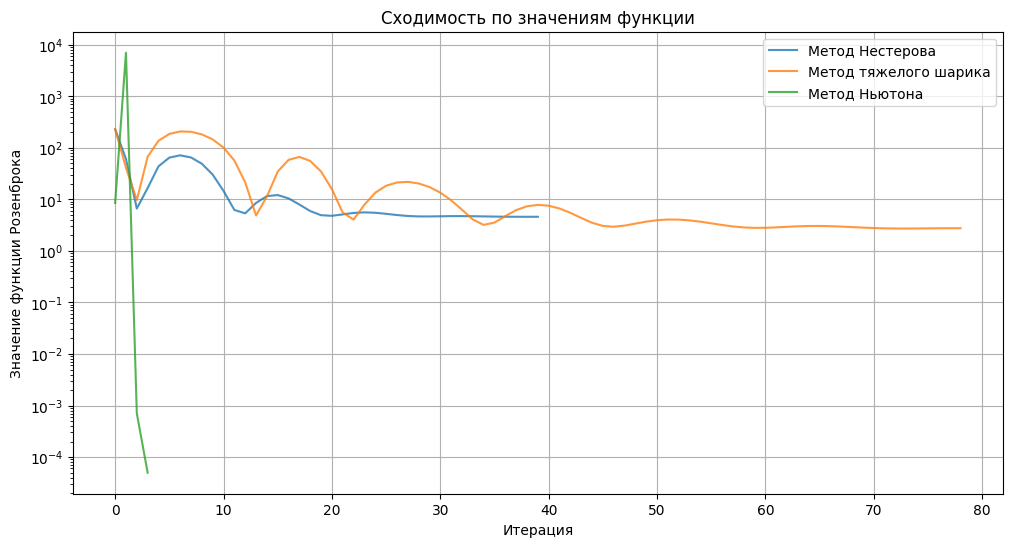

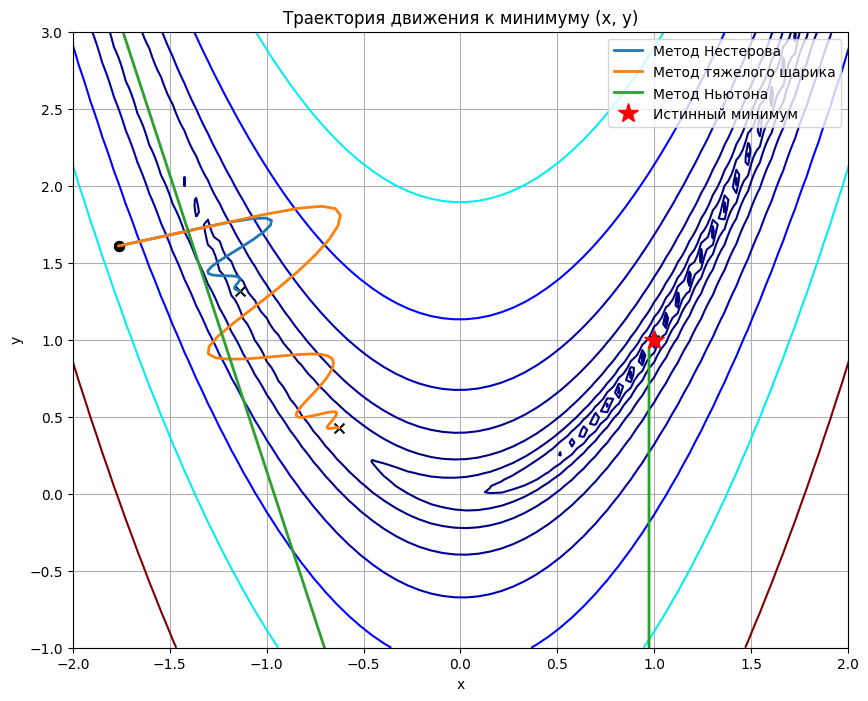

In [45]:
# график значений функции
plt.figure(figsize=(12, 6))
for method, values in history.items():
    plt.plot(values, label=method, alpha=0.8)

plt.xlabel("Итерация")
plt.ylabel("Значение функции Розенброка")
plt.title("Сходимость по значениям функции")
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()

# график траекторий
x_vals = np.linspace(-3, 3, 100)
y_vals = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock([X, Y])

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 10), cmap='jet')

for method, trajectory in history_x.items():
    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 0], trajectory[:, 1], label=method, linewidth=2)
    plt.scatter(trajectory[0, 0], trajectory[0, 1], marker='o', color='black', s=50)
    plt.scatter(trajectory[-1, 0], trajectory[-1, 1], marker='x', color='black', s=50)

# Истинный минимум
plt.plot(1, 1, 'r*', markersize=15, label='Истинный минимум')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Траектория движения к минимуму (x, y)")
plt.legend()
plt.grid(True)
plt.xlim(-2, 2)
plt.ylim(-1, 3)
plt.show()
